In [2]:
import pandas as pd
import seaborn as sns
import random

from Bio import SeqIO

In [3]:
path = "../outputs/salad-irg/metaMDBG/metabat2_bins_reads_alignement/checkm_report.txt"
bin_prefix = "../outputs/salad-irg/metaMDBG/metabat2_bins_reads_alignement/bins/"

criteria = ["Bin ID", "Completeness", "Contamination", "Contigs","Size", "N50", "N50/Size"]
x_criteria = 1
y_criteria = 2

def GSCS_quality(contamination, completeness, contigs, size) : 
    if ((contamination <=1) and (completeness >=99) and (contigs <=1)) : 
        return "near complete"   
    if ((contamination <=5) and (completeness >=90)) :
        return "high quality"     
    if ((contamination <=10) and (completeness >=50)) :
        return "medium quality"   
    return "low quality"



In [4]:
bins = pd.read_csv("../outputs/salad-irg/metaMDBG/metabat2_bins_reads_alignement/checkm_report.txt", delim_whitespace=True, skiprows=6, 
    names = ["Bin ID", "Marker", "lineage", "genomes", "markers", "sets", "0", "1", "2", "3", "4", "5+", 
             "Completeness", "Contamination", "Strain hetero", "Contigs", "Size", "N50", "N50/Size"])

bins = bins[criteria]
bins.sort_values([criteria[x_criteria], criteria[y_criteria]], inplace = True)


bins["Quality"] = bins.apply(lambda x: GSCS_quality(x['Contamination'], x['Completeness'], x['Contigs'], x['Size']), axis=1)

bins

/tmp/ipykernel_4279/2430762477.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bins = pd.read_csv("../outputs/salad-irg/metaMDBG/metabat2_bins_reads_alignement/checkm_report.txt", delim_whitespace=True, skiprows=6,


,Bin ID,Completeness,Contamination,Contigs,Size,N50,N50/Size,Quality
0,bin.1,0.0,0.00,19,218836.0,13160.0,0.060136,low quality
4,bin.102,0.0,0.00,33,266511.0,8983.0,0.033706,low quality
6,bin.104,0.0,0.00,34,269892.0,9416.0,0.034888,low quality
8,bin.106,0.0,0.00,69,438286.0,6694.0,0.015273,low quality
11,bin.109,0.0,0.00,60,291557.0,5349.0,0.018346,low quality
...,...,...,...,...,...,...,...,...
175,bin.257,100.0,766.48,7884,53490017.0,7466.0,0.000140,low quality
82,bin.173,100.0,1170.38,11913,76785553.0,7046.0,0.000092,low quality
163,bin.246,100.0,1713.63,19842,110104676.0,5944.0,0.000054,low quality
147,bin.231,100.0,2086.88,26200,144604122.0,5959.0,0.000041,low quality


(0.0, 100.0)

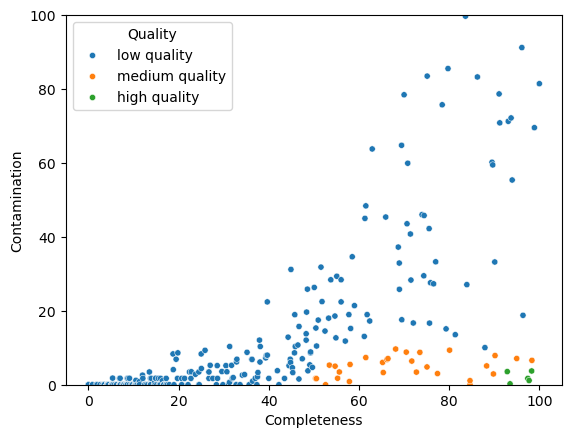

In [5]:
plot = sns.scatterplot(data=bins, 
        x=criteria[x_criteria], y=criteria[y_criteria], hue='Quality', 
         s=20, alpha=1)
plot.set_ylim(0,100)


In [6]:
print(bins[bins["Quality"] == "high quality"].sample()["Bin ID"])
print(bins[bins["Quality"] == "medium quality"].sample()["Bin ID"])
print(bins[bins["Quality"] == "low quality"].sample()["Bin ID"])

173    bin.255
Name: Bin ID, dtype: object
79    bin.170
Name: Bin ID, dtype: object
314    bin.382
Name: Bin ID, dtype: object


In [8]:
target_contigs = []
with open(bin_prefix + "bin.300" + ".fa", "r") as fasta_file :
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence = str(record.seq)
        tmp = [">" + record.name]
        
        tmp.append(sequence[0:min(5000, len(sequence))])
        #i = 0
        #while i < len(sequence) : 
        #    i2 = min(i+10000, len(sequence))
        #    tmp.append(sequence[i:i2])
        #    i = i2
        target_contigs.append(tmp)

  
random.shuffle(target_contigs) 

for i in target_contigs : 
    for j in i : 
        print(j)


>ctg1090108_1x_l
ATGACGCTGGTGTAGGTCCGCCAGAGGCCGCCTCGGTTGGTGGGCATGGGGATGCGGACGACGCGGAGTGAGCGGCCGTCGAGCATCTTGAGCCGCGAGAGGATGCCGGCGTTCTCGTCGAGGATGGCGGCGCTGAGAGGGTCGGCGTTGTAGTCGTACTGGCCGACGACGATGGTGTCGGGGGAGACGAAGGCGGCGAAGACGTCCACGTGGCCGGTGCGCTCGCCGCGGAGCGGCTTGAGCATGACGCACTGGTTGATGCCGCAACGCTGGTGGAGGATGCCGGCGATGGCGCGGCCGTCGTAGTTGCGGGAGCGGTTGGCGGGGATGACGGCCTGGGTCATCACGGCAAGCCCGTGGCCGTTGACCAGCAGGTTACCGCCGGCGAGGGTCAGGGGGATGTGGGTGACGGCCAGGCCCAGGGCCTTGCCGAGCTCCTGCGCGGTCTGGGCGTCGTCGGGTCGGGCGGGGTCGGGGTCCGAGCAGAGCATGAAGAGGCGGCCGTCAGCAGCGGGGAGGAAGGCGGGGGCGTAGTCGCGGAGCCAAAGGCCGGCGGTGGGGATGCGGACGTAGGTGAGGTTGTGGGCGGGGAGGCCCCAGTCCACAAGCAGGGTGATCAGGTCGCGGCGCTGCTCTTCGGTGCGGACGACGGCGACGACCGGGACGTGGTCGATGAGGGCGCGGATGACGTCAATAAGCACCTGGGGGCAACTGGCCATCATGCCGGCGCACTGGAGGACAATGGCGGAGTGCTCTTGAAAGTTTGCCGCCGGCCCGCCCCGGGTCTCCATGACTGATGAACGCATGTTTGTGTGCCTTTATTCCGTGCGACGCGGCGACGGATTCAACCAAGTGACGGCGGGGGGATAATAGGGGTGATGTCTCCGGGAGGACTGCGTGTTCTTGTTGTCGGGGCTGCCGTCGTATTGGCGGTGGGGAGGGTACACGCGGCTGAAGATGGCGGCGACTTTTCCCGGGATGTG